In [218]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from scipy.stats import spearmanr

In [67]:
from sklearn import datasets
import pandas as pd
 
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [9]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [205]:
b = df['target']>120
df[b]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
...,...,...,...,...,...,...,...,...,...,...,...
430,-0.009147,-0.044642,-0.056863,-0.050428,0.021822,0.045345,-0.028674,0.034309,-0.009919,-0.017646,183.0
432,0.009016,-0.044642,0.055229,-0.005671,0.057597,0.044719,-0.002903,0.023239,0.055684,0.106617,173.0
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0


In [215]:
df.groupby(pd.cut(df['target'], [0, 100, 150, 200, 250, 300, 350])).mean()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
target,,,,,,,,,,,
"(0, 100]",-0.010252,-0.003421,-0.027646,-0.022381,-0.012344,-0.011761,0.023578,-0.023903,-0.030578,-0.018542,70.844595
"(100, 150]",-0.001148,0.003019,-0.006665,-0.007600,-0.000486,0.003400,-0.001023,-0.001297,-0.006980,-0.005793,125.542553
"(150, 200]",0.003406,-0.004824,-0.000053,0.003089,-0.000733,0.000648,-0.006445,0.001710,0.006386,0.003379,176.949367
"(200, 250]",0.010053,0.009828,0.025590,0.023307,0.026884,0.020170,-0.021771,0.034236,0.041259,0.012310,226.464286
"(250, 300]",0.014429,-0.001653,0.042655,0.040954,0.006471,0.003420,-0.022827,0.020214,0.034836,0.032222,271.431373
"(300, 350]",0.004086,0.009828,0.079557,0.027774,0.006785,0.004703,-0.035775,0.041162,0.042149,0.049219,318.071429


In [8]:
def Media(a):
    return sum(a)/len(a)

In [45]:
def Mediana(b):
    if len(b)%2==1:
        return b[int(((len(b)+1)/2)-1)]
    else:
        return float(b[int(((len(b))/2))] + b[int(((len(b))/2))-1]/2)

In [55]:
def Moda(c):
    return max((c.count(item), item) for item in set(c))[1]

In [56]:
def Varianza(a):
    n = len(a)
    mean = sum(a) / n
    return sum((item - mean)**2 for item in a) / (n - 1)

In [57]:
def Desv(a):
    return Varianza(a)**0.5

In [63]:
def Sesgo(a):
    n = len(a)
    return (sum((item - Media(a))**3 for item in a)* n / ((n - 1) * (n - 2) * Desv(a)**3))

In [66]:
from scipy.stats import shapiro

In [137]:
p=[]
for i in range(1,10):
    _,a = shapiro(df.iloc[:,i])
    p.append(a)

In [151]:
for i in range(0,9):
    if p[i] < 0.05:
        print(f'Variable de columna {i} no parece normal')
    else:
        print(f'Variable de columna {i} parece normal')

Variable de columna 0 no parece normal
Variable de columna 1 no parece normal
Variable de columna 2 no parece normal
Variable de columna 3 no parece normal
Variable de columna 4 no parece normal
Variable de columna 5 no parece normal
Variable de columna 6 no parece normal
Variable de columna 7 no parece normal
Variable de columna 8 no parece normal


Utilizando la prueba de normalidad Shapiro-Wilk podemos ver que no parecen seguir una distribución normal, por lo que se considera que las variables del conjunto de datos son no paramétricas.

In [152]:
type(df)

pandas.core.frame.DataFrame

In [217]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [156]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [176]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


Observando la matriz de correlación vemos que variables como s1-s2, s4-s2, s4-s3 y s5-s4 muestran una correlación elevada.

In [203]:
rho, p = spearmanr(df['s3'],df['s4'])
print(f'Valor rho: {rho}')
print(f'Valor p: {p}')
if p > 0.05:
    print('La correlacion no es estadisticamente significativa')
else:
    print('La correlacion es estadisticamente significativa')

Valor rho: -0.789694151916184
Valor p: 2.091963405143764e-95
La correlacion es estadisticamente significativa


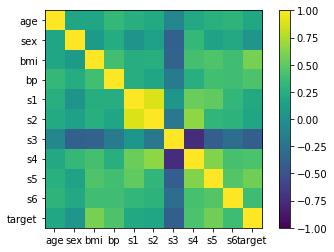

In [197]:
plt.figure()
plt.imshow(df.corr())
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10], labels=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6','target'])
plt.yticks(ticks=[0,1,2,3,4,5,6,7,8,9,10], labels=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6','target'])
plt.clim(vmin = -1, vmax = 1)
plt.colorbar()
plt.show()